### 1. Import Library

Langkah pertama adalah mengimpor semua pustaka yang diperlukan untuk analisis data dan pemodelan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

### 2. Load Data

load dan membersihkan data untuk analisis lebih lanjut.

In [2]:
# Mengimpor dataset
# Mengimpor data dari file csv
file_path = r"C:\Users\User\Downloads\Data Mining\Forecasting_ARIMA\AirPassengers.csv"  # Ganti dengan path file Excel Anda
data = pd.read_csv(file_path)

In [3]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 3. Data Cleaning

In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data['Passengers'] = data['Passengers'].astype(int)

### 4. Visualisasi Data Awal

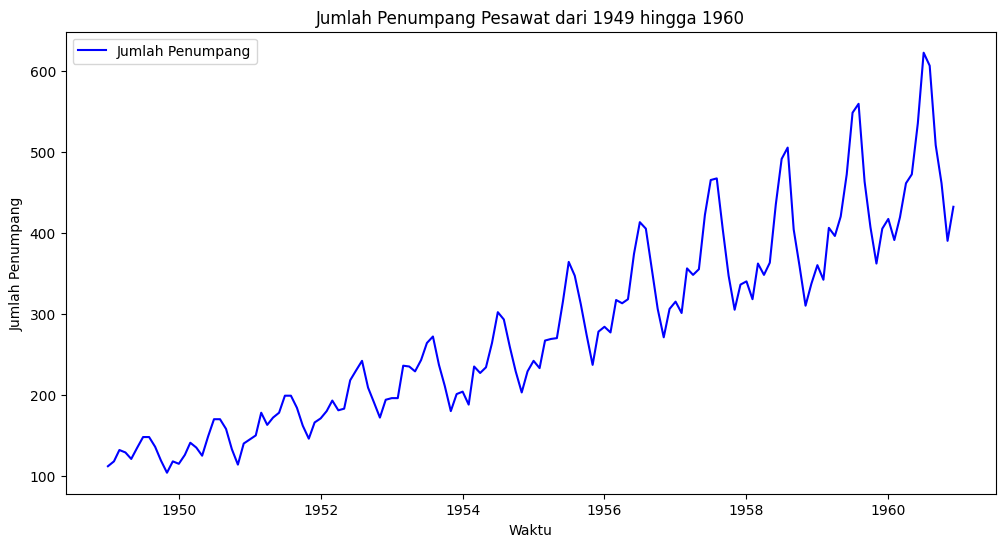

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Jumlah Penumpang', color='blue')
plt.title('Jumlah Penumpang Pesawat dari 1949 hingga 1960')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()

### 5. Menguji Stasionaritas

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Passengers'])
print(f'Statistik ADF: {result[0]}')
print(f'Nilai p: {result[1]}')

Statistik ADF: 0.8153688792060482
Nilai p: 0.991880243437641


### 6. Membangun Model ARIMA

In [16]:
model = ARIMA(data['Passengers'], order=(2, 1, 2))  # Memilih parameter p, d, q
model_fit = model.fit()  # Melatih model
print(model_fit.summary())  # Menampilkan ringkasan model

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 02 Oct 2024   AIC                           1353.347
Time:                        22:56:24   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.798      0.0

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 7. Evaluasi Model

In [8]:
# Menghitung prediksi
predictions = model_fit.forecast(steps=12)  # Memprediksi 12 bulan ke depan
print(predictions)

1961-01-01    439.855344
1961-02-01    465.297276
1961-03-01    500.666674
1961-04-01    535.971564
1961-05-01    561.688584
1961-06-01    571.311503
1961-07-01    562.970543
1961-08-01    539.727529
1961-09-01    508.527028
1961-10-01    478.147167
1961-11-01    456.748248
1961-12-01    449.698762
Freq: MS, Name: predicted_mean, dtype: float64


### 8. Visualisasi Hasil Prediksi

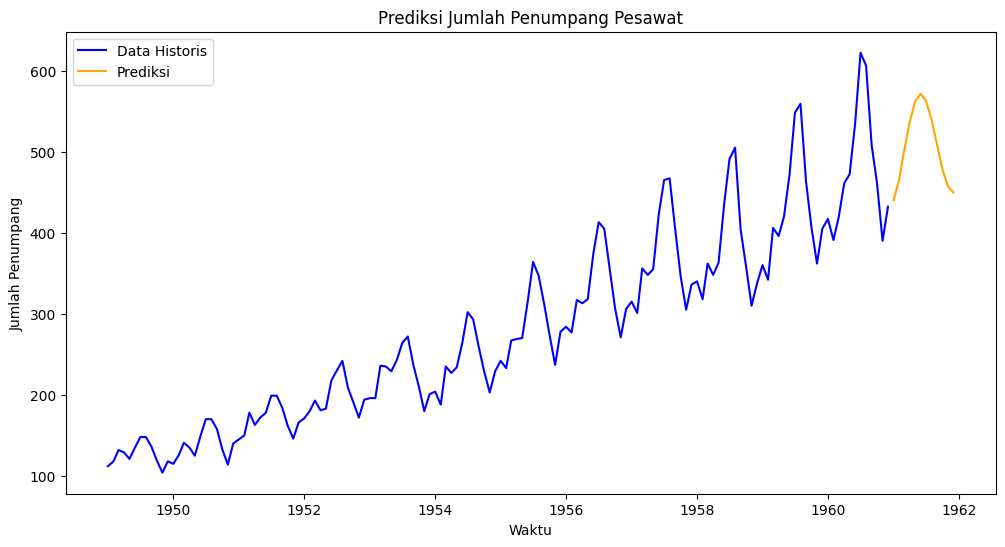

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Data Historis', color='blue')
plt.plot(predictions, label='Prediksi', color='orange')
plt.title('Prediksi Jumlah Penumpang Pesawat')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()

### 9. Menghitung MSE

In [10]:
# Menghitung kesalahan kuadrat rata-rata
mse = mean_squared_error(data['Passengers'][-12:], predictions)  # Menghitung MSE untuk data terbaru
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3386.2162837864457
